In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import BeginnersGraphs as ev
import ipywidgets as widgets
import pandas as pd

In [2]:
 ev.clean_directory('alterbbn_v2.2', 'alter_eta.c', if_PC=False)

['make', '-C', 'alterbbn_v2.2', 'alter_eta.c']

make: Circular alter_eta.c <- alter_eta.c dependency dropped.



In [3]:
#Input: (set X as data you want)
#1 t(s), a, T (MeV), Tnu (MeV), #5 photons, baryons, rho_{nu}, drho_{nu}, phi (GeV^4), #10 rho_vs(GeV^4), sigma_rad (GeV^4), Y(n), Y(p), Y(2H), #15 Y(3H), Y(3He), Y(4He), Y(6Li), Y(7Li), #20 Y(7Be), eta
X = 13

In [4]:
def Evo_Graph_Func(N,X):
    subprocess.run(['./alterbbn_v2.2/alter_eta.x', str(N)], capture_output = True, text = False) 
    data = np.loadtxt('evolution.out', delimiter=',', skiprows=1, usecols=range(21), unpack=True)
    column1 = data[2]
    columnD = data[X]*50
    DMax = np.max(columnD)
    DFinal = columnD[-1]
    max_y_index = np.argmax(columnD)
    DX_max = columnD[max_y_index]
    return DFinal, DMax, DX_max

In [5]:
etaArr = np.linspace(10e-10, 10e-9, num = 10)
    

In [7]:
DFinal_list = []
DMax_list = []
DX_max_list = []
for N in etaArr:
    DFinal, DMax, DX_max = Evo_Graph_Func(N,X)
    DFinal_list.append(DFinal)
    DMax_list.append(DMax)
    DX_max_list.append(DX_max)
   
print("Eta Values:", etaArr)
print("DFinal values:", DFinal_list)
print("DMax values:", DMax_list)
print("DX_max values:", DX_max_list)

Eta Values: [1.e-09 2.e-09 3.e-09 4.e-09 5.e-09 6.e-09 7.e-09 8.e-09 9.e-09 1.e-08]
DFinal values: [0.000380043, 7.35085e-05, 1.7494e-05, 4.303585e-06, 1.07806e-06, 2.707155e-07, 6.59595e-08, 1.66261e-08, 4.231135e-09, 1.075785e-09]
DMax values: [0.1106795, 0.0766125, 0.06046549999999999, 0.049915400000000006, 0.04327595, 0.0389532, 0.03560725, 0.032922099999999996, 0.030711999999999996, 0.0288088]
DX_max values: [0.1106795, 0.0766125, 0.06046549999999999, 0.049915400000000006, 0.04327595, 0.0389532, 0.03560725, 0.032922099999999996, 0.030711999999999996, 0.0288088]


In [8]:
axs = [[None for i in range(3)] for j in range(3)]

In [9]:
eta = np.linspace(1e-9,1e-10,10)
p1 = DFinal_list
p2 = DMax_list
p3 = DX_max_list

data = [p1, p2, p3]
datalabels = [r'$DFinal_list$', r'$DMax_list$', r'$DX_max_list$', r'$\eta$']

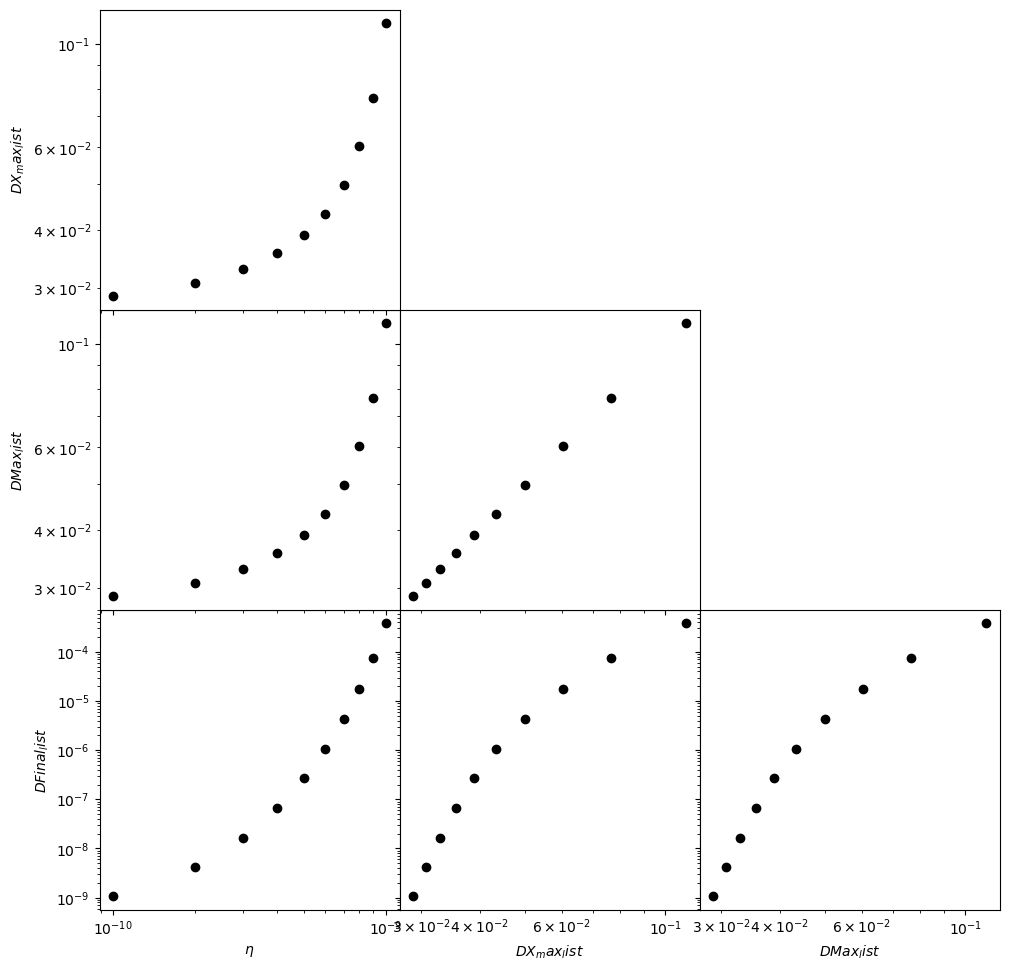

In [10]:
plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(3-i):
        axs[i][j] = plt.axes([0.08 + 0.3 * j, 0.08 + 0.3 *i, 0.3, 0.3])
for i in range(3):
    axs[i][0].loglog(eta, data[i], 'ko')
    axs[i][0].set_ylabel(datalabels[i])
    
for j in range(1,3):
    for i in range(3-j):
        axs[i][j].loglog(data[-j], data[i], 'ko')

for j in range(3):
    axs[0][j].set_xlabel(datalabels[-(j+1)])

for i in range(1,3):
    for j in range(3-i):
        axs[i][j].xaxis.set_major_formatter(plt.NullFormatter())
        axs[i][j].xaxis.set_minor_formatter(plt.NullFormatter())

for i in range(3):
    for j in range(1,3-i):
        axs[i][j].yaxis.set_major_formatter(plt.NullFormatter())
        axs[i][j].yaxis.set_minor_formatter(plt.NullFormatter())
